<a href="https://colab.research.google.com/github/Ivanio1/itmo-deep-learning/blob/main/deepLearning_convolutionalNeuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рассмотрим сегментирование изображений с помощью глубоких нейросетевых архитектур на примере Mask R-CNN.

Мы воспользуемся уже обученной моделью. Установим требуемые библиотеки.

In [32]:
!pip install -q tensorflow==2.4.3
!pip install -q keras==2.3.0

Клонируем репозиторий с исходниками. Импортируем требуемые библиотеки

In [33]:
!git clone https://github.com/dvolchek/Mask_RCNN.git
%cd /content/Mask_RCNN
!python -q /content/Mask_RCNN/setup.py install

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/content/Mask_RCNN
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/setuptools/dist.py:697: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  warnings.warn(
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-i

Создаем конфигурацию, определяем поля

In [34]:
class MaskRCNNConfig(Config):
    NAME = "coco_pretrained_model_config"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8 # минимальный процент отображения прямоугольника
    NUM_CLASSES = 81

Загружаем файл с весами

In [35]:
import os
import mrcnn.utils
DATASET_FILE = "mask_rcnn_coco.h5"
if not os.path.exists(DATASET_FILE):
    mrcnn.utils.download_trained_weights(DATASET_FILE)

Создаем модель

In [36]:
model = modellib.MaskRCNN(mode="inference", model_dir=os.getcwd(), config=MaskRCNNConfig())

Загружаем веса

In [37]:
model.load_weights(DATASET_FILE, by_name=True)

Из директории Mask_RCNN/images/ выбираем любой файл

/content/Mask_RCNN/images/Comp_Vision_Task_5_File_2.jpg


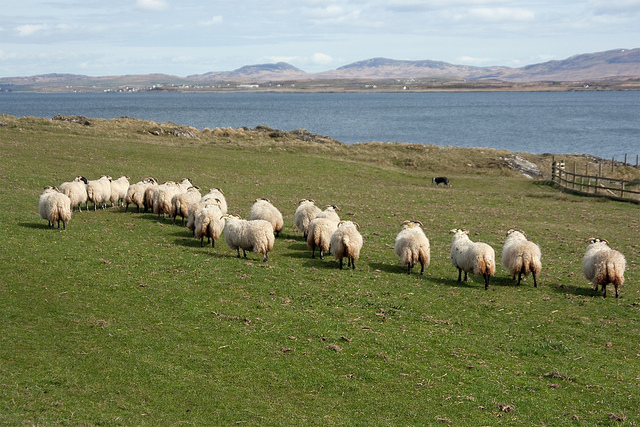

In [38]:
import random
import cv2
import imutils
from google.colab.patches import cv2_imshow
DIR = '/content/Mask_RCNN/images'
file = "Comp_Vision_Task_5_File_2.jpg"
file = os.path.join(DIR, file)
print(file)
image = cv2.imread(file)
cv2_imshow(image) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)


Запускаем модель

In [39]:
r = model.detect([image], verbose=1)[0]

Processing 1 images
image                    shape: (341, 512, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  140.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:2323: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Результаты работы модели находятся в словаре:
*   rois -- bounding boxes обнаруженных объектов
*   class_ids -- метки назначенных классов
*   scores -- вероятности отнесения к назначенным классам
*   masks -- маски -- результат сегментации






Данная модель способна определить более 80 различных объектов. Соответствующий файл скачивается в формате .json, который нетрудно распарсить средствами питона. Но для данной темы достаточно определить эти типы объектов явным образом.

In [40]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 

Что мы ожидаем увидеть? На выбранном изображении модель найдет все объекты из списка и сегментирует их.

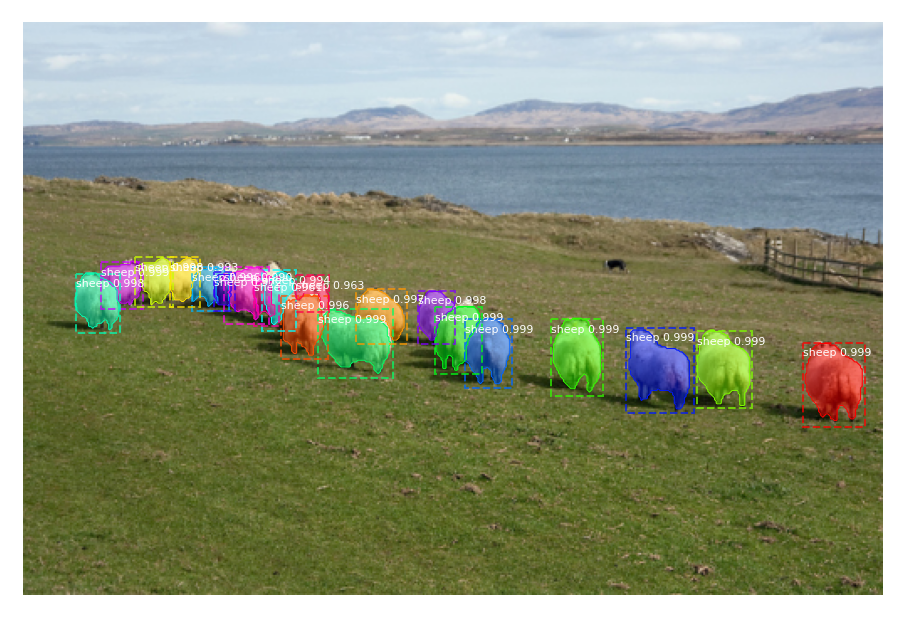

In [41]:
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            CLASS_NAMES, r['scores'])


In [42]:
r

{'rois': array([[176, 314, 222, 345],
        [183, 401, 229, 434],
        [176, 263, 217, 291],
        [190, 464, 240, 501],
        [169, 245, 209, 273],
        [181, 359, 232, 399],
        [170, 175, 211, 220],
        [142,  46, 170,  71],
        [149,  31, 184,  57],
        [159, 235, 191, 257],
        [139,  66, 169,  89],
        [158, 198, 191, 228],
        [162, 153, 200, 181],
        [145, 100, 171, 122],
        [147, 142, 183, 162],
        [139,  87, 169, 105],
        [145, 119, 179, 146],
        [148, 113, 171, 126],
        [150, 162, 172, 182],
        [151, 137, 180, 152]], dtype=int32),
 'class_ids': array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19], dtype=int32),
 'scores': array([0.99938583, 0.999206  , 0.9990134 , 0.99893624, 0.99885154,
        0.9987997 , 0.99860233, 0.99851996, 0.99848586, 0.998437  ,
        0.9976998 , 0.9969584 , 0.99636275, 0.9958269 , 0.99380374,
        0.9934953 , 0.99033725, 0.97201

<function mrcnn.visualize.draw_rois(image, rois, refined_rois, mask, class_ids, class_names, limit=10)>